### FBprophet

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [65]:
df_incomes = pd.read_excel('../data/gpb_adm_data.xlsx', sheet_name=1)
X = df_incomes.drop(columns='TID').values

# 3. Нормализация данных
scaler = TimeSeriesScalerMeanVariance()  # Нормализация данных
X_scaled = scaler.fit_transform(X)

# 4. Применение TimeSeriesKMeans для кластеризации
# Задаем количество кластеров (например, 3)
n_clusters = 3

model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True)
y_pred = model.fit_predict(X_scaled)

# 5. Добавляем кластерные метки в данные
df_incomes['Cluster'] = y_pred

d:\projects\gpb\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\projects\gpb\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\projects\gpb\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\projects\gpb\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


156.647 --> 85.404 --> 84.109 --> 83.774 --> 83.694 --> 83.662 --> 83.650 --> 83.644 --> 83.639 --> 83.628 --> 83.613 --> 83.592 --> 83.566 --> 83.531 --> 83.497 --> 83.459 --> 83.429 --> 83.409 --> 83.391 --> 83.373 --> 83.353 --> 83.331 --> 83.314 --> 83.302 --> 83.286 --> 83.276 --> 83.270 --> 83.268 --> 83.267 --> 83.266 --> 83.265 --> 83.265 --> 


In [66]:
df_incomes.head()

,TID,2022-09-01 00:00:00,2022-09-02 00:00:00,2022-09-03 00:00:00,2022-09-04 00:00:00,2022-09-05 00:00:00,2022-09-06 00:00:00,2022-09-07 00:00:00,2022-09-08 00:00:00,2022-09-09 00:00:00,...,2022-11-22 00:00:00,2022-11-23 00:00:00,2022-11-24 00:00:00,2022-11-25 00:00:00,2022-11-26 00:00:00,2022-11-27 00:00:00,2022-11-28 00:00:00,2022-11-29 00:00:00,2022-11-30 00:00:00,Cluster
0,406136,90000,105000,99000,107000,110000,60000,75000,89000,95000,...,78000,0,165000,0,189000,106000,94000,75000,74000,0
1,406139,103000,206000,168000,124000,78000,165000,164000,174000,88000,...,153000,151000,157000,206000,182000,123000,138000,112000,179000,1
2,406145,143000,136000,124000,117000,123000,140000,139000,138000,118000,...,100000,179000,169000,118000,118000,114000,128000,121000,124000,0
3,406148,50000,73000,53000,65000,75000,100000,53000,52000,82000,...,55000,65000,85000,95000,68000,62000,0,118000,70000,0
4,406180,96000,82000,71000,72000,86000,55000,55000,75000,75000,...,56000,70000,59000,105000,70000,77000,87000,59000,55000,1


In [67]:
# Преобразуем данные в длинный формат (мельчение по дням)
df = pd.read_excel('../data/gpb_adm_data.xlsx', sheet_name=1)
df_long = df.melt(id_vars=['TID'], var_name='ds', value_name='y')

# Преобразуем столбец 'ds' в datetime
df_long['ds'] = pd.to_datetime(df_long['ds'])

# Теперь у нас есть датафрейм с нужными столбцами для FBProphet
print(df_long.head())

      TID         ds       y
0  406136 2022-09-01   90000
1  406139 2022-09-01  103000
2  406145 2022-09-01  143000
3  406148 2022-09-01   50000
4  406180 2022-09-01   96000


In [68]:
weather = pd.read_csv('../data/data_weather.csv')
weather = weather.rename(columns={"date":"ds"})
weather['ds'] = pd.to_datetime(weather['ds'])
weather.head()

,ds,weather,avg_temp,avg_wind,avg_humidity,pressure,precipitation,rain
0,2022-09-01,Днем 1 сентября 2022 года в Москве характер по...,11.5,1.0,69.0,ниже нормы,Были осадки,Не было дождя
1,2022-09-02,Днем 2 сентября 2022 года в Москве характер по...,9.5,1.0,73.5,в пределах нормы,Были осадки,Был дождь
2,2022-09-03,Днем 3 сентября 2022 года в Москве характер по...,12.5,1.0,63.0,в пределах нормы,Без осадков,Не было дождя
3,2022-09-04,Днем 4 сентября 2022 года в Москве характер по...,11.5,1.0,58.0,в пределах нормы,Без осадков,Не было дождя
4,2022-09-05,Днем 5 сентября 2022 года в Москве характер по...,10.0,1.5,74.5,в пределах нормы,Были осадки,Не было дождя


Прогнозирование по банкоматам:   0%|          | 0/10 [00:00<?, ?it/s]C:\Users\r9634\AppData\Local\Temp\ipykernel_15572\2691798020.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)
17:06:01 - cmdstanpy - INFO - Chain [1] start processing
17:06:01 - cmdstanpy - INFO - Chain [1] done processing


Банкомат 406136 — MSE: 1811529835.27 | MAE: 30393.61


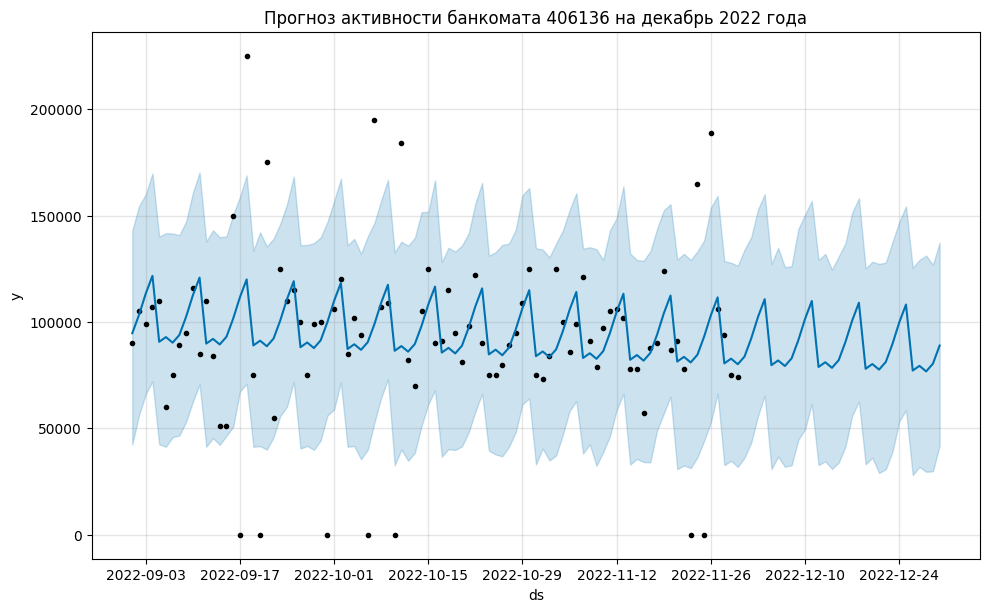

Прогнозирование по банкоматам:  10%|█         | 1/10 [00:01<00:13,  1.45s/it]C:\Users\r9634\AppData\Local\Temp\ipykernel_15572\2691798020.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)
17:06:02 - cmdstanpy - INFO - Chain [1] start processing
17:06:02 - cmdstanpy - INFO - Chain [1] done processing


Банкомат 406139 — MSE: 894105033.54 | MAE: 23296.44


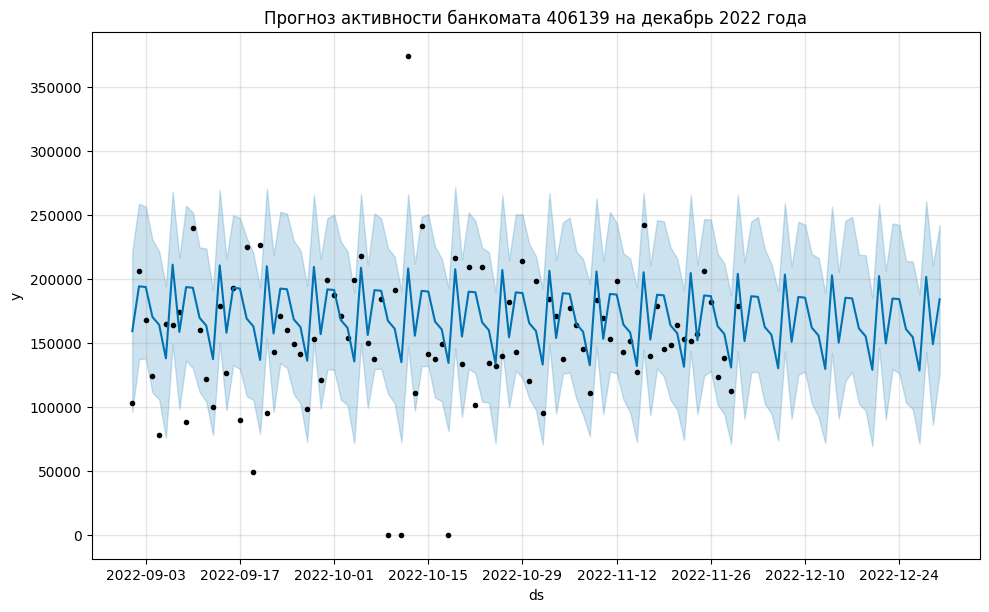

Прогнозирование по банкоматам:  20%|██        | 2/10 [00:02<00:11,  1.43s/it]C:\Users\r9634\AppData\Local\Temp\ipykernel_15572\2691798020.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)
17:06:04 - cmdstanpy - INFO - Chain [1] start processing
17:06:04 - cmdstanpy - INFO - Chain [1] done processing


Банкомат 406145 — MSE: 4862401760.93 | MAE: 53245.43


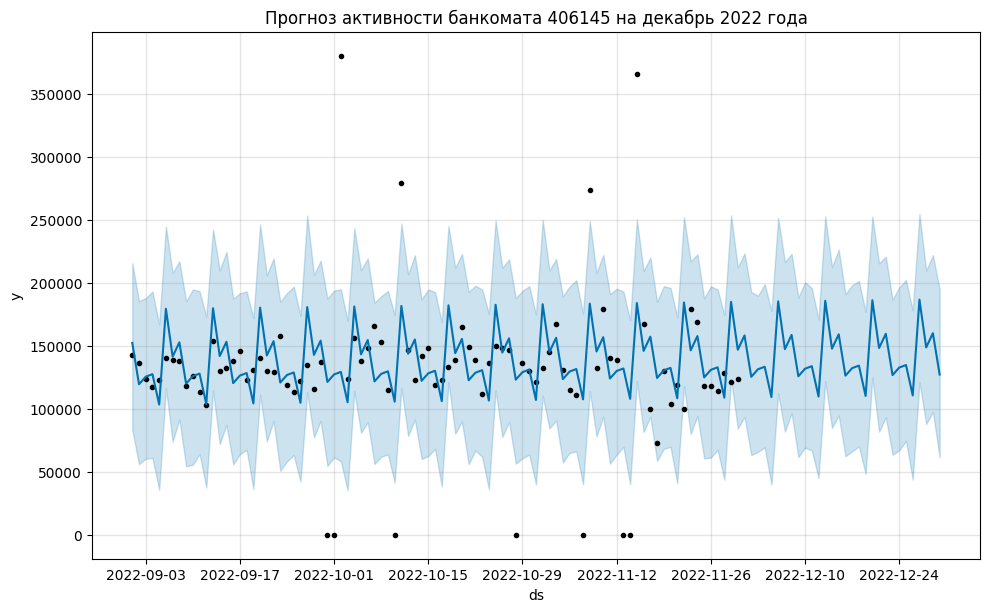

Прогнозирование по банкоматам:  30%|███       | 3/10 [00:04<00:09,  1.37s/it]C:\Users\r9634\AppData\Local\Temp\ipykernel_15572\2691798020.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)
17:06:05 - cmdstanpy - INFO - Chain [1] start processing
17:06:05 - cmdstanpy - INFO - Chain [1] done processing


Банкомат 406148 — MSE: 478401045.67 | MAE: 17706.70


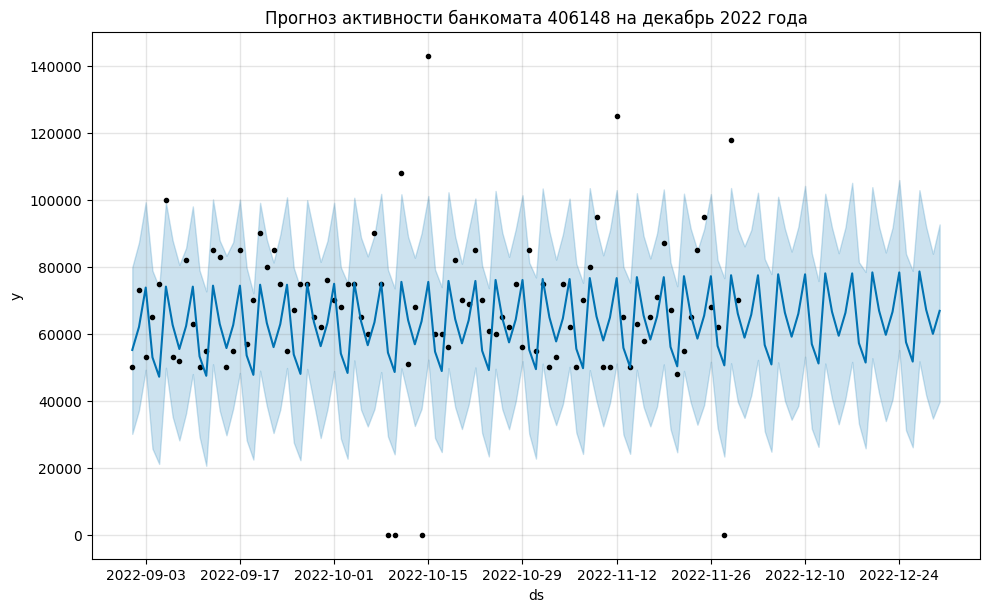

Прогнозирование по банкоматам:  40%|████      | 4/10 [00:05<00:08,  1.38s/it]C:\Users\r9634\AppData\Local\Temp\ipykernel_15572\2691798020.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)
17:06:06 - cmdstanpy - INFO - Chain [1] start processing
17:06:06 - cmdstanpy - INFO - Chain [1] done processing


Банкомат 406180 — MSE: 319718425.45 | MAE: 13726.83


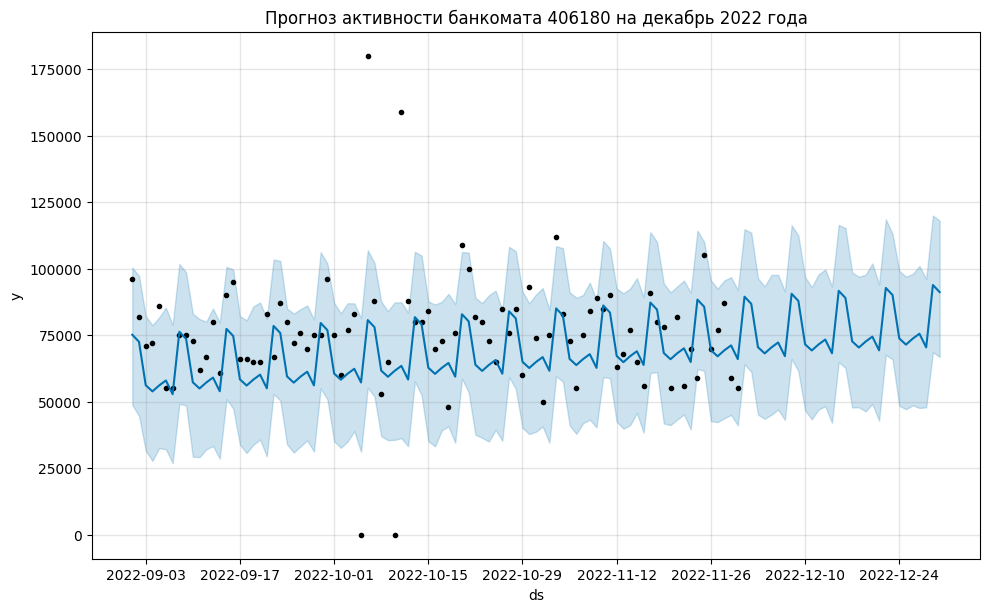

Прогнозирование по банкоматам:  50%|█████     | 5/10 [00:06<00:06,  1.40s/it]C:\Users\r9634\AppData\Local\Temp\ipykernel_15572\2691798020.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)
17:06:08 - cmdstanpy - INFO - Chain [1] start processing
17:06:08 - cmdstanpy - INFO - Chain [1] done processing


Банкомат 406190 — MSE: 1663632840.34 | MAE: 31585.95


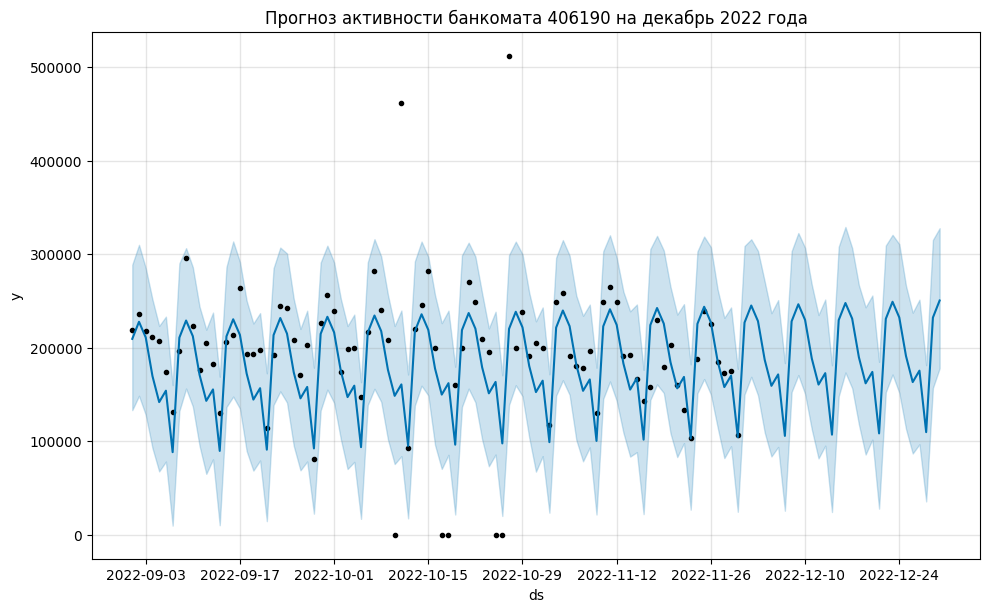

Прогнозирование по банкоматам:  60%|██████    | 6/10 [00:08<00:05,  1.43s/it]C:\Users\r9634\AppData\Local\Temp\ipykernel_15572\2691798020.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)
17:06:09 - cmdstanpy - INFO - Chain [1] start processing
17:06:09 - cmdstanpy - INFO - Chain [1] done processing


Банкомат 406196 — MSE: 5635025115.07 | MAE: 62617.49


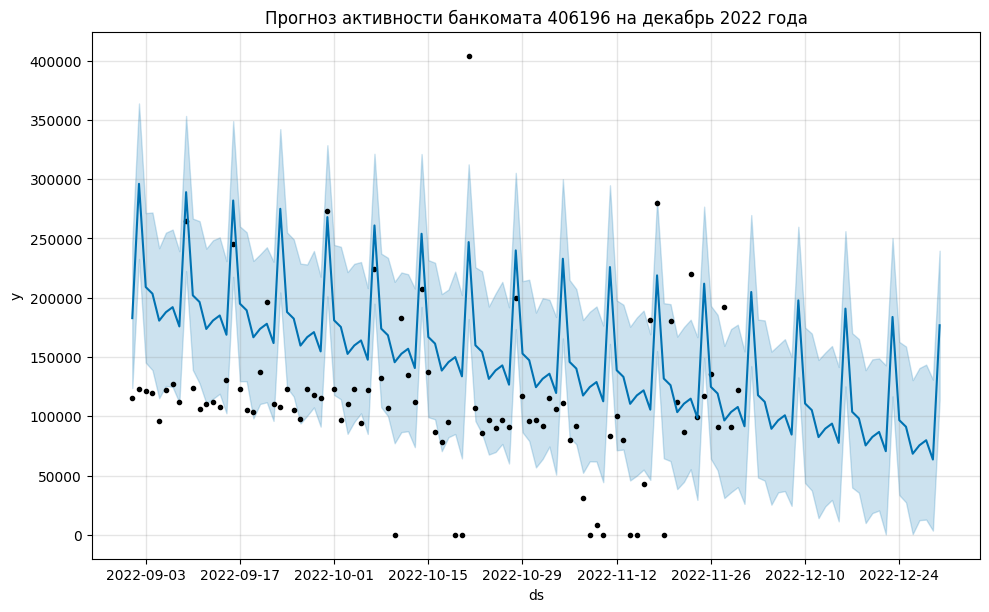

Прогнозирование по банкоматам:  70%|███████   | 7/10 [00:09<00:04,  1.41s/it]C:\Users\r9634\AppData\Local\Temp\ipykernel_15572\2691798020.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)
17:06:11 - cmdstanpy - INFO - Chain [1] start processing
17:06:11 - cmdstanpy - INFO - Chain [1] done processing


Банкомат 406504 — MSE: 3445473084.10 | MAE: 51126.53


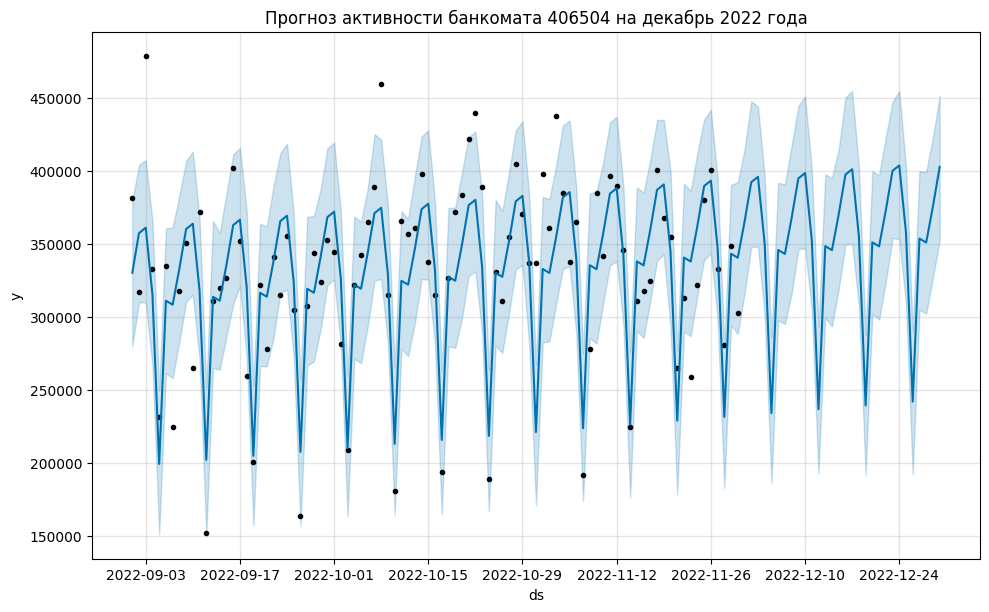

Прогнозирование по банкоматам:  80%|████████  | 8/10 [00:11<00:02,  1.43s/it]C:\Users\r9634\AppData\Local\Temp\ipykernel_15572\2691798020.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)
17:06:12 - cmdstanpy - INFO - Chain [1] start processing
17:06:12 - cmdstanpy - INFO - Chain [1] done processing


Банкомат 406509 — MSE: 2524452145.93 | MAE: 38508.22


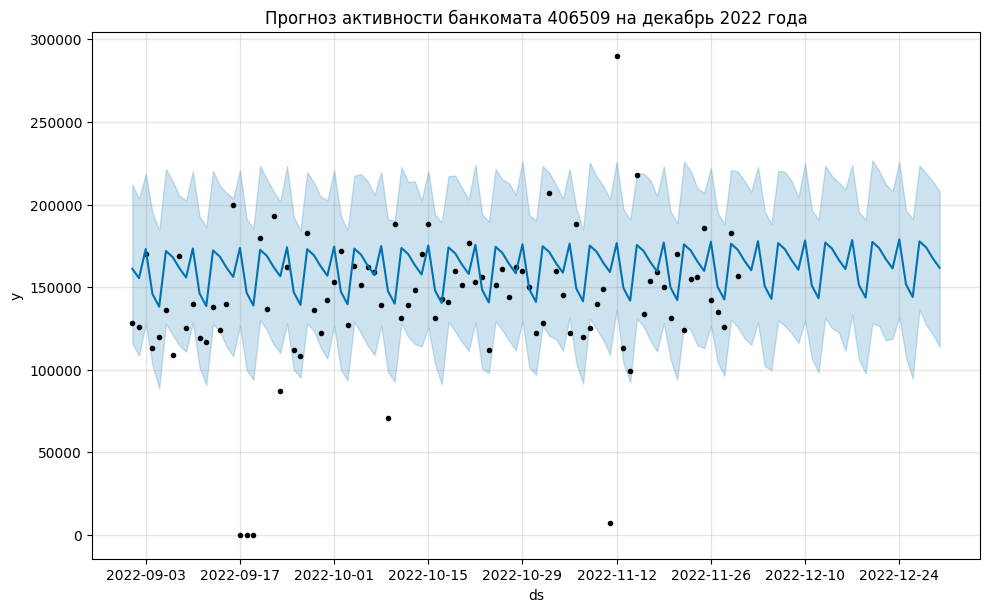

Прогнозирование по банкоматам:  90%|█████████ | 9/10 [00:12<00:01,  1.40s/it]C:\Users\r9634\AppData\Local\Temp\ipykernel_15572\2691798020.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)
17:06:13 - cmdstanpy - INFO - Chain [1] start processing
17:06:14 - cmdstanpy - INFO - Chain [1] done processing


Банкомат 406536 — MSE: 948184649.47 | MAE: 23608.89


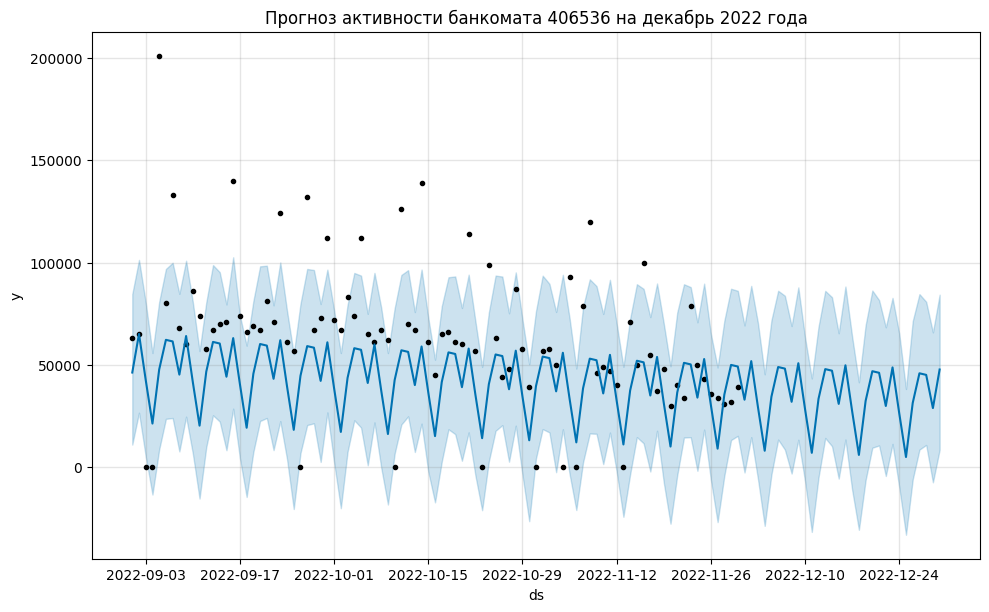

Прогнозирование по банкоматам: 100%|██████████| 10/10 [00:14<00:00,  1.40s/it]

Все прогнозы успешно сохранены в 'atm_forecasts_december2022.csv'


In [69]:
from tqdm import tqdm
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt

# 1. Кодируем погодные признаки
pressure_map = {'ниже нормы': -1, 'в пределах нормы': 0, 'выше нормы': 1}
weather['pressure_encoded'] = weather['pressure'].map(pressure_map)

weather['precipitation_encoded'] = weather['precipitation'].apply(lambda x: 1 if 'Были осадки' in x else 0)
weather['rain_encoded'] = weather['rain'].apply(lambda x: 1 if 'Был дождь' in x else 0)

weather = weather.drop(columns=['pressure', 'precipitation', 'rain'])

# 2. Инициализация хранилищ
all_forecasts = []

# 3. Получаем список всех банкоматов
atm_ids = df_long['TID'].unique()

# 4. Цикл обработки банкоматов с tqdm
for tid in tqdm(atm_ids[0:10], desc="Прогнозирование по банкоматам"):
    try:
        df_atm = df_long[df_long['TID'] == tid].copy()
        
        df_merged = pd.merge(df_atm, weather, on='ds', how='left')
        df_merged.fillna(method='ffill', inplace=True)
        

        df_merged['TID'] = tid
        
        # Теперь можно безопасно мержить кластеры
        df_merged = pd.merge(df_merged, df_incomes[['TID', 'Cluster']], on='TID', how='left')
        
        m = Prophet()
        for reg in ['avg_temp', 'avg_wind', 'avg_humidity', 'pressure_encoded', 'precipitation_encoded', 'rain_encoded', 'Cluster']:
            m.add_regressor(reg)
        
        m.fit(df_merged[['ds', 'y', 'avg_temp', 'avg_wind', 'avg_humidity', 
                         'pressure_encoded', 'precipitation_encoded', 'rain_encoded', 'Cluster']])
        
        df_cv = cross_validation(m, horizon='30 days', initial='60 days', period='15 days', parallel="processes")
        df_p = performance_metrics(df_cv)
        print(f"Банкомат {tid} — MSE: {df_p['mse'].mean():.2f} | MAE: {df_p['mae'].mean():.2f}")

        
        future = m.make_future_dataframe(periods=30)
        last_known = df_merged.iloc[-1]
        for col in ['avg_temp', 'avg_wind', 'avg_humidity', 'pressure_encoded', 'precipitation_encoded', 'rain_encoded', 'Cluster']:
            future[col] = last_known[col]
        
        forecast = m.predict(future)
        
        forecast_december = forecast[(forecast['ds'] >= '2022-12-01') & (forecast['ds'] < '2023-01-01')][['ds', 'yhat']].copy()
        forecast_december['TID'] = tid
        
        all_forecasts.append(forecast_december)
        
        fig = m.plot(forecast)
        plt.title(f'Прогноз активности банкомата {tid} на декабрь 2022 года')
        plt.show()
    
    except Exception as e:
        print(f"Ошибка при обработке банкомата {tid}: {e}")



# 5. Объединяем все прогнозы
final_forecasts = pd.concat(all_forecasts, ignore_index=True)

# 6. Сохраняем в файл
final_forecasts.to_csv('../data/atm_forecasts_december2022.csv', index=False)

print("Все прогнозы успешно сохранены в 'atm_forecasts_december2022.csv'")
